## Exercícios

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2] em qualquer dataset que você desejar (recomendação: iris). Compare os resultados utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].

* [1] http://scikit-learn.org/stable/modules/clustering.html#k-means

* [2] http://scikit-learn.org/0.17/modules/clustering.html#hierarchical-clustering

* [3] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

2 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 

* Ajuda: atributos do [k-means](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

3 - Após a questão 2, você aplicou o algoritmo com K apropriado. Refaça o cálculo das métricas de acordo com os resultados de clusters obtidos com a questão anterior e verifique se o resultado melhorou.







In [47]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, decomposition

In [48]:
dataset = datasets.load_iris()

dataset_X = dataset.data
dataset_y = dataset.target

print(dataset_X)
print(dataset_y)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [54]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(dataset_X)

predictions = kmeans.predict(dataset_X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

In [55]:
reduced_data = decomposition.PCA(n_components=2).fit_transform(dataset_X)

reduced_data_df = pd.DataFrame(reduced_data)
reduced_data_df[2] = predictions

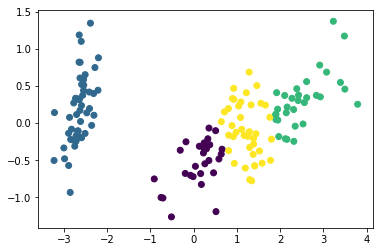

In [56]:
# plots
fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=reduced_data_df[2])
plt.show()

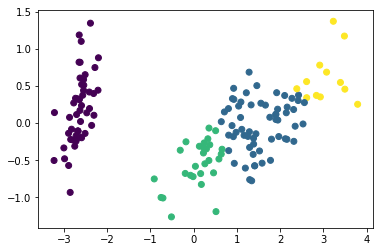

In [57]:
k = 4
agglo = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="complete").fit_predict(dataset_X)


# AgglomerativeClustering
fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=agglo)
plt.show()

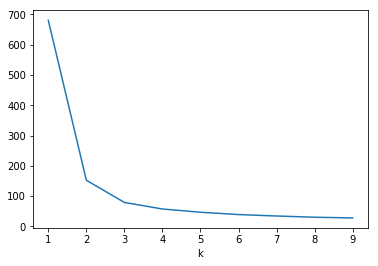

In [53]:
# Metodo do Cotovelo para identificar o melhor k
nC = np.arange(1,10); eixo_y = []    

for n in nC:
    kmeans.n_clusters = n
    kmeans.fit(dataset_X)
    
    eixo_y.append(kmeans.inertia_)
    
plt.figure()
plt.xlabel('k')
plt.plot(nC,eixo_y)

plt.show()

Através do método do cotovelo, observamos que o melhor k para o modelo é k=3, que é exatamente o número de classes existentes no dataset escolhido.

  Refazendo a análise para k = 3

In [58]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(dataset_X)

predictions = kmeans.predict(dataset_X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [59]:
reduced_data = decomposition.PCA(n_components=2).fit_transform(dataset_X)

reduced_data_df = pd.DataFrame(reduced_data)
reduced_data_df[2] = predictions

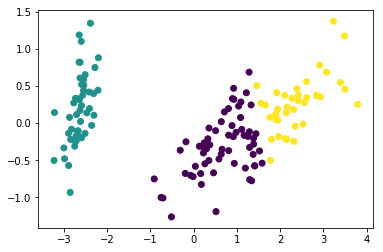

In [60]:
# plots
fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=reduced_data_df[2])
plt.show()

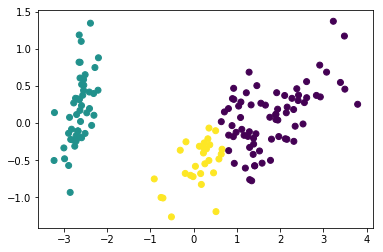

In [61]:
k = 3
agglo = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="complete").fit_predict(dataset_X)


# AgglomerativeClustering
fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=agglo)
plt.show()